In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

## arcFace學習中

支援python版本: 3.5以上   
支援pytorch版本 : 1.2以上

In [2]:
import time
import glob
import os
import math
import cv2
import builtins
os.environ['TRIDENT_BACKEND'] = 'pytorch'
#!pip install tridentx --upgrade
import trident as T
from trident import *
from trident.models import senet


trident 0.5.6
Using Pytorch backend.
Image Data Format: channels_first.
Image Channel Order: rgb.
Using pillow image backend.
Pillow version:7.1.2.
Pytorch version:1.5.1+cu101.


目前深度學習人臉識別的數據模式有兩種主流，傳統的作法是使用三位一體的方式同時提供anchor、positive以及negative，來做為度量學習的基礎，好讓anchor與positive走的更近，讓anchor與negative離得更遠。第二種則是將一個人物視為唯一類別，而所有這個人的人臉都會隸屬於其中，所以自然而然的同一個人的多張張照片就構成了anchor與positive，並且不同人的照片組合就像是anchor與negative。

In [3]:
data_provider=load_lfw(format='aligned_face', is_paired=False)


data_provider.image_transform_funcs=[
    random_transform(rotation_range= 15, zoom_range= 0.02, shift_range= 0.02,shear_range = 0.02,random_flip= 0.15),
    random_adjust_gamma((0.8,1.2)),
    random_adjust_contrast((0.8,1.2)),
    random_adjust_hue(),
    random_mirror(),
    random_center_crop(112,112,scale=(0.95,1.05)),
    normalize(127.5,127.5)]

_,_=data_provider.next()
print(len(data_provider.class_names.items()))
print(data_provider.signature)

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
extraction is finished, donnot need extract again.
C:/Users/Allan/.trident/datasets/lfw/lfw-crop
['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodhara

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barbara_Esbin/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barbara_Felt-Miller/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barbara_Roberts/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barbara_Walters/*.*g
4
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barbora_Strycova/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barbra_Streisand/*.*g
3
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barrett_Jackman/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Alvarez/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Bonds/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Collier/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Diller/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Ford/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Hinson/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_Nakell/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Barry_

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Christopher_Walken/*.*g
4
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Christopher_Whittle/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Christy_Ferer/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Christy_Turlington/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuanyun_Li/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Amato/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Bednarik/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Eidson/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Finley/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Hagel/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Woolery/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chuck_Yeager/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chung_Mong-hun/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chung_Mong-joon/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Chyun

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Compass/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Fenech_Adami/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Jordan/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Lewis/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Lucio/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Murray/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddie_Sutton/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddy_Hartenstein/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Eddy_Merckx/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Edgar_Savisaar/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Edie_Falco/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Edina_Batar/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Edith_Masai/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Edmund_Hillary/*.*g
3
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Edmund_Stoiber/*.*g
13

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gianni_Agnelli/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Giannina_Facio/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gideon_Black/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gideon_Yago/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gil_Cates/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gil_de_Ferran/*.*g
5
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gilberto_Rodriguez_Orejuela/*.*g
4
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gilberto_Simoni/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gilles_Panizzi/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gillian_Anderson/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gina_Centrello/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gina_Gershon/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gina_Lollobrigida/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Gina_Torres/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-David_Levitte/*.*g
10
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Francois_Lemounier/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Francois_Pontal/*.*g
3
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Luc_Bideau/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Marc_Olive/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Marc_de_La_Sabliere/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Patrick_Nazon/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Pierre_Bemba/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Pierre_Raffarin/*.*g
7
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Rene_Fourtou/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean-Sebastien_Giguere/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean_Brumley/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean_Carnahan/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Jean_Charest/*.*g

2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julianne_Moore/*.*g
19
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julie_Andrews/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julie_Gerberding/*.*g
15
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julie_Goodenough/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julie_Infante/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julie_Taymor/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julien_Boutter/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julien_Varlet/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Juliette_Binoche/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Juliette_Lewis/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julio_Cesar_Chavez/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julio_Cesar_Franco/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julio_De_Brun/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Julio_Iglesias_Jr/*.*g
2
C:/Users/Allan/.trident/datasets/

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lionel_Richie/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Girman/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Gottsegen/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Leslie/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Ling/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Marie_Presley/*.*g
4
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Murkowski/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Raymond/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Stansfield/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Lisa_Stone/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Liu_Mingkang/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Liu_Xiaoqing/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Liu_Ye/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Liv_Tyler/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Liza_Minnelli/*.*g
7
C:/Users/Al

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Michelle_Pfeiffer/*.*g
3
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Michelle_Rodriguez/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Michelle_Yeoh/*.*g
5
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Mick_Jagger/*.*g
5
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Mick_McCarthy/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Mickey_Gilley/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Mickey_Loomis/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Mickey_Rooney/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Mickey_Sherman/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Micky_Arison/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Micky_Ward/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Miguel_Aldana_Ibarra/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Miguel_Angel_Rodriguez/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Miguel_Contreras/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lf

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Lockhart/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Luvera/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Martin/*.*g
8
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_McCartney/*.*g
7
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_McNulty/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Michael_Daniels/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Murphy/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Newman/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_ONeill/*.*g
9
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Otellini/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Patton/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Pierce/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Reiser/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Sarbanes/*.*g
3
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Paul_Schrader/*.*g
1
C:/U

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Benigni/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Canessa/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Carlos/*.*g
4
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Cavalli/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Cercelletta/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Guaterroma/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Laratro/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Lavagna/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Marinho/*.*g
3
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Robaina/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Roberto_Tovar/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Robin_Cook/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Robin_Johansen/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Robin_McGraw/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lf

1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Suzanne_Torrance/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Suzie_McConnell_Serio/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Sven_Goran_Eriksson/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Sven_Ottke/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Svend_Aage_Jensby/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Svend_Robinson/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Svetislav_Pesic/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Svetlana_Belousova/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Svetlana_Koroleva/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Svetoslav_Todorov/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Sybille_Schmid/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Syed_Abdul_Rahman_Geelani/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Syed_Ibrahim/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Sylvester_Stallone/*.*g
9
C:/Users/

C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Murabito/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Nessen/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Overlin/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Perry/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Pryor_Jr/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Ragland/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Rehnquist/*.*g
2
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Rosenberg/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Shatner/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Swor/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Umbach/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/William_Webster/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Willie_Nelson/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lfw-crop/Willie_Wilson/*.*g
1
C:/Users/Allan/.trident/datasets/lfw/lf

In [4]:
#標準生成結構
se_resnet50 =senet.SE_ResNet50(include_top=False,
             pretrained=True,
             input_shape=(3,112,112))


se_resnet50.model.add_module('output_layer', 
    Sequential(
        Dropout(dropout_rate=0.4),
        Flatten(),
        Dense((512),use_bias=False),
    ))
              
se_resnet50.model.add_module('l2norm',L2Norm())     
se_resnet50.model.add_module('fc', Dense((5749),use_bias=False))

..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


model file is already existing, donnot need download again.


C:\Anaconda3\envs\azuremlenv\lib\site-packages\torch\serialization.py:657: SourceChangeWarning: source code of class 'trident.layers.pytorch_layers.Dense' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
is_resume=False #是否為接續執行

if not is_resume:
    #非接續執行讀取預訓練模型
    se_resnet50=Model(input_shape=(3,112,112),output=load('arcface_se_resnet_50_512.pth'))
    se_resnet50.model.trainable=False
    se_resnet50.model.fc.trainable=True
else:
    #接續執行讀取上次存檔
    se_resnet50=Model(input_shape=(3,112,112),output=load('Models/arcface.pth'))
    se_resnet50.model.trainable=True

se_resnet50.summary()

0 parameters have set untrainable
0 parameters have set trainable
--------------------------------------------------------------------------------------------------------------------------------
              Layer (type)                   Output Shape            Weight           Bias    Param #     FLOPS #   
input_layer.conv                         [-1, 64, 112, 112]    [64, 3, 3, 3]                  1728      43339520.0  
input_layer.norm                         [-1, 64, 112, 112]    [64]                 [64]      128       2395904.0   
input_layer.activation                   [-1, 64, 112, 112]    [64]                           64        1593088.0   
input_layer                              [-1, 64, 112, 112]                                   0         0.0         
body.0.res_layer.0                       [-1, 64, 112, 112]    [64]                 [64]      128       2395904.0   
body.0.res_layer.1.conv                  [-1, 64, 112, 112]    [64, 64, 3, 3]                 36864    

In [6]:

class ArcMarginProductLoss(Layer):
    def __init__(self, scale=32.0, margin=0.50, easy_margin=False, num_filters=5749,name='ArcMarginProductLoss'):
        super(ArcMarginProductLoss, self).__init__()
        self._name=name
        self.num_filters=num_filters
        self.scale = scale
        self.m = margin
        self.easy_margin = easy_margin
        self.cos_m = math.cos(margin)
        self.sin_m = math.sin(margin)

        # make the function cos(theta+m) monotonic decreasing while theta in [0°,180°]
        self.th = math.cos(math.pi - margin)
        self.mm = math.sin(math.pi - margin) * margin
        self.base_loss=CrossEntropyLoss(reduction='mean')


    def forward(self, output, target,**kwargs):
        # cos(theta)
        try:
            cosine=l2_normalize(output)
            
            # cos(theta + m)
            sine = sqrt(1.0 - pow(cosine, 2))
            phi = cosine * self.cos_m - sine * self.sin_m

            if self.easy_margin:
                phi = where(cosine > 0, phi, cosine)
            else:
                phi = where((cosine - self.th) > 0, phi, cosine - self.mm)

            one_hot = zeros_like(cosine,requires_grad=True)
            one_hot.scatter(1, target.view(-1, 1), 1)

            output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
            output = output * self.scale
        except Exception as e:
            print(e)
            PrintException()

        loss = self.base_loss(output, target)
        return loss.mean()

In [7]:
class CustomCallback(CallbackBase):
    def __init__(self):
        super(CustomCallback, self).__init__()
    def on_epoch_start(self, training_context):
        if training_context['current_epoch']==2:
            training_context['current_model'].trainable=True
            

In [8]:

se_resnet50.with_optimizer(optimizer='Ranger', lr=1e-3, betas=(0.9, 0.999)) \
    .with_loss(ArcMarginProductLoss(scale=32.0, margin=0.50, easy_margin=True, num_filters=5749)) \
    .with_metric(accuracy, name='accuracy') \
    .with_regularizer('l2',reg_weight=1e-4) \
    .with_constraint('min_max_norm') \
    .with_model_save_path('Models/arcface.pth') \
    .with_callbacks(PrintGradientsCallback(batch_inteval=100))\
    .with_callbacks(CustomCallback())\
    .with_learning_rate_scheduler(reduce_lr_on_plateau,monitor='accuracy',mode='max',factor=0.5,patience=2,cooldown=1,threshold=2e-4,warmup=0)
    
   

ArcMarginProductLoss( output, target) -> ArcMarginProductLoss 
accuracy( output, target) -> accuracy 


Model(
  (inputs): [3, 112, 112]
  (_outputs): [tensor(512, device='cuda:0')]
  (_targets): [tensor(512, device='cuda:0')]
  (name): ''
  (optimizer): Ranger (
  Parameter Group 0
      N_sma_threshhold: 5
      alpha: 0.5
      betas: (0.9, 0.999)
      eps: 1e-05
      k: 6
      lr: 0.001
      step_counter: 0
      weight_decay: 0
  )
  (lr_scheduler): None
  (_losses): ArcMarginProductLoss(
    (base_loss): CrossEntropyLoss()
  )
  (_metrics): functools.partial(<function accuracy at 0x00000249FD4D3D90>)
  (loss_weights): 1.0
  (_signature): model( input: Tensor[[3, 112, 112]]) -> output: Tensor[[tensor(512, device='cuda:0')]] 
  (_regs): functools.partial(<function l2_reg at 0x00000249FD4B1EA0>, reg_weight=0.0001)
  (_constraints): functools.partial(<function min_max_norm at 0x00000249FD4B1C80>)
  (base_lr): 0.001
  (warmup): 0
  (sample_collect_history): []
  (preprocess_flow): []
  (current_save_path): None
  (epoch_loss_history): []
  (weights_history): []
  (gradients_history)

In [9]:
plan=TrainingPlan()\
    .add_training_item(se_resnet50)\
    .with_data_loader(data_provider)\
    .repeat_epochs(300)\
    .within_minibatch_size(8)\
    .print_progress_scheduling(50,unit='batch')\
    .display_loss_metric_curve_scheduling(200,unit='batch',imshow=True)\
    .save_model_scheduling(20,unit='batch')

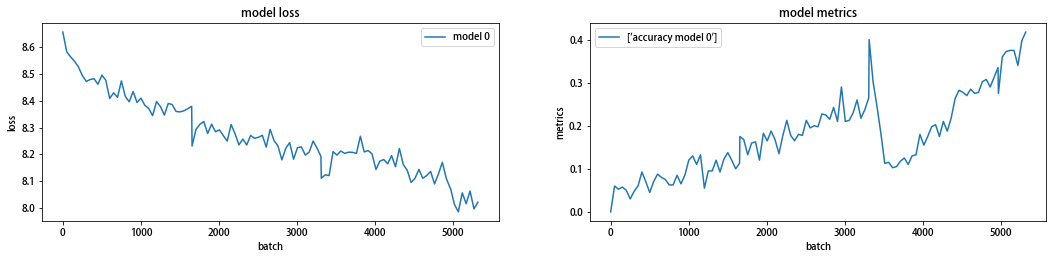

model 0      Step: 1m16s    | Loss: 8.003   | accuracy: 33.750%  | learning rate: 2.500e-04 | epoch: 3  ( 400/1655 )
model 0           first_layer gradients: 6.076e-05| last_layer gradients: 2.297e-05
model 0      Step: 1m34s    | Loss: 8.012   | accuracy: 44.500%  | learning rate: 2.500e-04 | epoch: 3  ( 450/1655 )
model 0      Step: 1m16s    | Loss: 8.053   | accuracy: 37.750%  | learning rate: 2.500e-04 | epoch: 3  ( 500/1655 )
model 0           first_layer gradients: 1.069e-04| last_layer gradients: 3.921e-05
model 0      Step: 1m20s    | Loss: 7.993   | accuracy: 42.000%  | learning rate: 2.500e-04 | epoch: 3  ( 550/1655 )


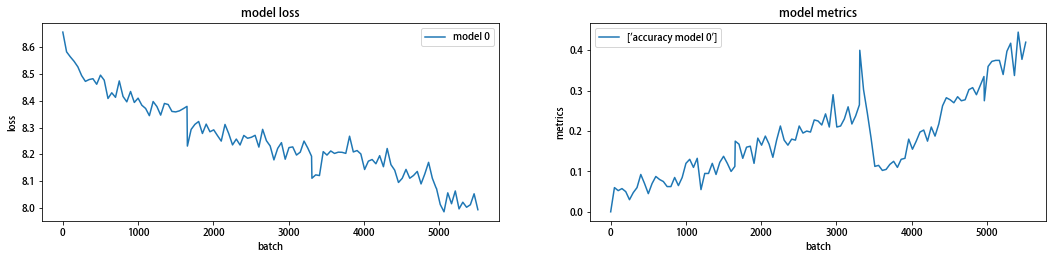

model 0      Step: 1m17s    | Loss: 8.041   | accuracy: 42.500%  | learning rate: 2.500e-04 | epoch: 3  ( 600/1655 )
model 0           first_layer gradients: 5.946e-05| last_layer gradients: 2.048e-05
model 0      Step: 1m20s    | Loss: 8.073   | accuracy: 35.250%  | learning rate: 2.500e-04 | epoch: 3  ( 650/1655 )
model 0      Step: 1m16s    | Loss: 8.006   | accuracy: 36.250%  | learning rate: 2.500e-04 | epoch: 3  ( 700/1655 )
model 0           first_layer gradients: 5.304e-05| last_layer gradients: 2.107e-05
model 0      Step: 1m18s    | Loss: 8.033   | accuracy: 36.250%  | learning rate: 2.500e-04 | epoch: 3  ( 750/1655 )


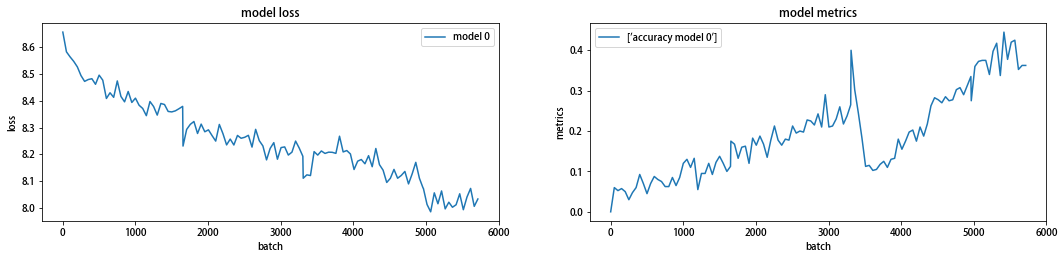

model 0      Step: 1m17s    | Loss: 8.056   | accuracy: 37.000%  | learning rate: 2.500e-04 | epoch: 3  ( 800/1655 )
model 0           first_layer gradients: 7.638e-05| last_layer gradients: 2.531e-05
model 0      Step: 1m18s    | Loss: 8.016   | accuracy: 38.250%  | learning rate: 2.500e-04 | epoch: 3  ( 850/1655 )
model 0      Step: 1m15s    | Loss: 8.041   | accuracy: 37.250%  | learning rate: 2.500e-04 | epoch: 3  ( 900/1655 )
model 0           first_layer gradients: 6.964e-05| last_layer gradients: 3.074e-05
model 0      Step: 1m33s    | Loss: 8.012   | accuracy: 38.250%  | learning rate: 2.500e-04 | epoch: 3  ( 950/1655 )


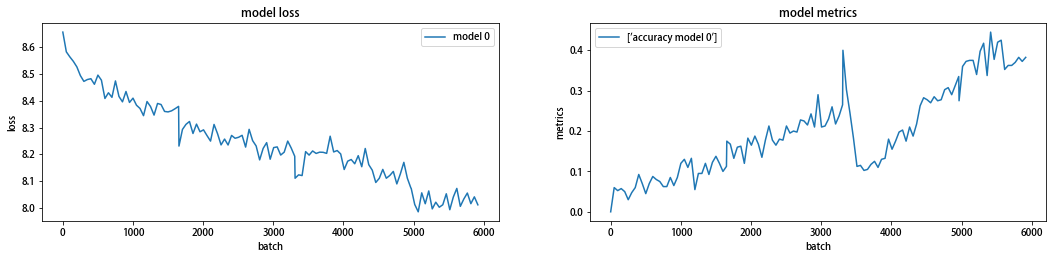

model 0      Step: 1m33s    | Loss: 8.085   | accuracy: 34.000%  | learning rate: 2.500e-04 | epoch: 3  ( 1000/1655 )
learning rate changed! ( form 2.500e-04 to 1.250e-04)

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.000125.
model 0           first_layer gradients: 4.504e-05| last_layer gradients: 2.431e-05


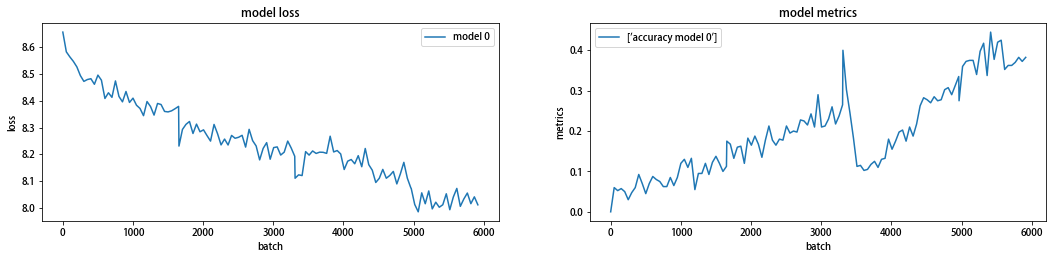

In [10]:
plan.start_now()